In [1]:
from pathlib import Path
from data.df_io import read, get_feat_lables
from data.df_prep import get_intensity, get_vertical_sym, pre_processing, pre_processing2
from visualization.dataset_plots import show_bin_dataset, show_dataset


train_path = Path("../digits/db/dataset_digits/train.csv")
test_path = Path("../digits/db/dataset_digits/test.csv")

In [2]:
df_train = read(train_path)
df_test = read(test_path)

In [ ]:
df_train.drop("label", axis=1).iloc[0].values.reshape((28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  89, 255, 254, 151,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6, 191, 253, 253, 253, 167,  76,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
df_test.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
train_redu = pre_processing(df_train, "vertical")
test_redu = pre_processing(df_test, "vertical")

In [6]:
train_redu.to_csv("db/train_redu_v.csv")
test_redu.to_csv("db/test_redu_v.csv")

In [7]:
X_train, Y_train = get_feat_lables(train_redu)

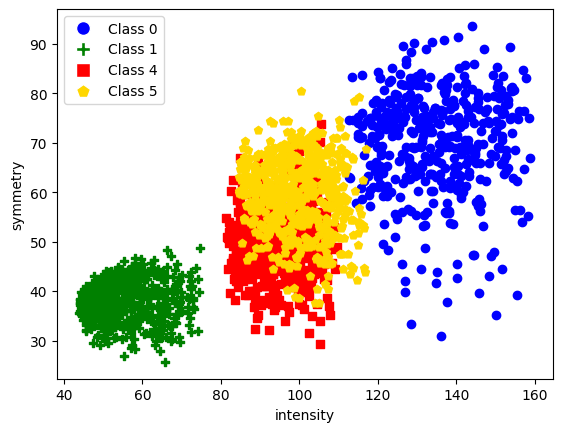

In [8]:
show_dataset(X_train, Y_train, X_train.columns)

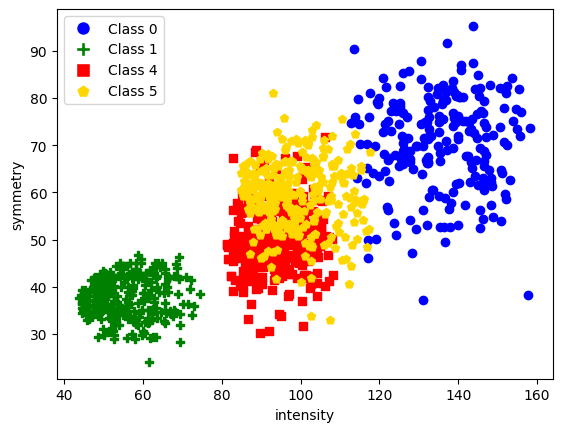

In [9]:
X_test, Y_test = get_feat_lables(test_redu)
show_dataset(X_test, Y_test, X_test.columns)

In [10]:
train_redu = pre_processing(df_train, "horizontal")
test_redu = pre_processing(df_test, "horizontal")

In [11]:
train_redu.to_csv("db/train_redu_h.csv")
test_redu.to_csv("db/test_redu_h.csv")

In [12]:
X_train, Y_train = get_feat_lables(train_redu)

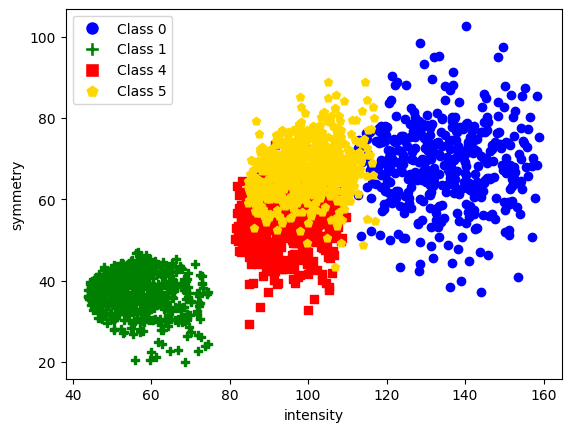

In [13]:
show_dataset(X_train, Y_train, X_train.columns)

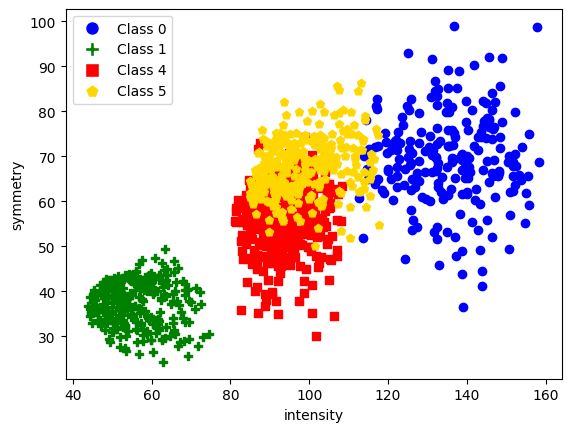

In [14]:
X_test, Y_test = get_feat_lables(test_redu)
show_dataset(X_test, Y_test, X_test.columns)

In [15]:
train_redu = pre_processing(df_train, "both")
test_redu = pre_processing(df_test, "both")

In [16]:
train_redu.to_csv("db/train_redu.csv")
test_redu.to_csv("db/test_redu.csv")

In [17]:
X_train, Y_train = get_feat_lables(train_redu)

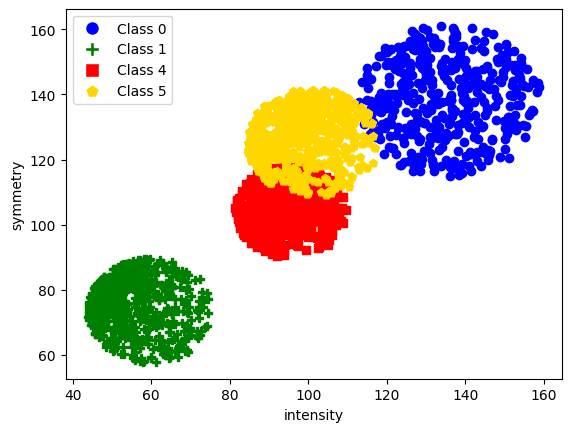

In [18]:
show_dataset(X_train, Y_train, X_train.columns)

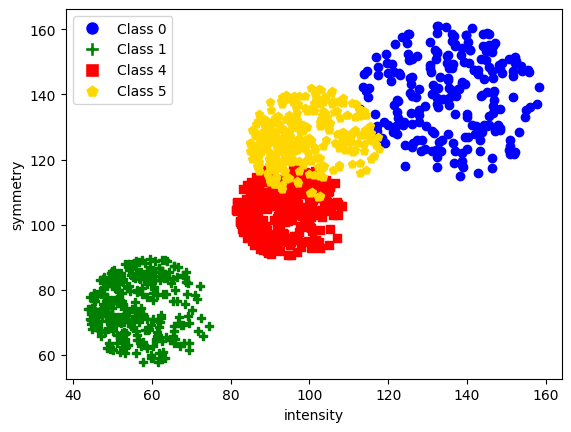

In [19]:
X_test, Y_test = get_feat_lables(test_redu)
show_dataset(X_test, Y_test, X_test.columns)

In [20]:
import pandas as pd
import numpy as np
l = [i for i in range(16)]
df = pd.DataFrame(l).transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [21]:
def reshape_rows(df: pd.DataFrame):
    reshaped_arrays = []
    for _, row in df.iterrows():
        reshaped_array = row.values.reshape((4, 4))
        reshaped_arrays.append(reshaped_array)
    return np.array(reshaped_arrays)

In [22]:
def get_vertical_sym(df: pd.DataFrame) -> pd.Series:
    res = []
    for _, row in df.iterrows():
        reshaped_array = row.values.reshape((4, 4))
        print(reshaped_array)
        acc = 0
        for i in range(4):
            for j in range(2):
                acc += abs(reshaped_array[i,j] - reshaped_array[i, 3-j])
        res.append(acc/255)
    return pd.Series(res)

In [23]:
get_vertical_sym(df)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


0    0.062745
dtype: float64